<a href="https://colab.research.google.com/github/danielcdo/-MachineLearning/blob/main/linearRegressionBeerConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

This Colab uses a real dataset to predict the beer consumption in Sao Paulo.

**Dataset source: ** https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

##Import relavant packages

#@title Import relevant modules - use '#@' to hidden code.

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import pylab as pl

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from math import sqrt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


## Import dataset
- load the dataset into Colab

In [3]:
from google.colab import files
uploaded = files.upload()


Saving beer_consumption.csv to beer_consumption.csv


In [4]:
# dataset as a Pandas dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['beer_consumption.csv']), sep=',', decimal=',')  # using the parameters sep=''', decimal=',' convert number with ',' 27,1 to 27.1

In [65]:
# Checking data
#df.columns()
#df.describe()
#df.info()
#df.head()

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   media_temp_celsius      365 non-null    float64
 1   mininum_temp_celsius    365 non-null    float64
 2   maximum_temp_celsius    365 non-null    float64
 3   precipitation_mm        365 non-null    float64
 4   weekend                 365 non-null    float64
 5   beer_consumption_liter  365 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [11]:
# convert object to float
df['beer_consumption_liter'] = df.beer_consumption_liter.astype(float)

In [12]:
df.dtypes

date                       object
media_temp_celsius        float64
mininum_temp_celsius      float64
maximum_temp_celsius      float64
precipitation_mm          float64
weekend                   float64
beer_consumption_liter    float64
dtype: object

In [13]:
# drop NaN values
df.dropna(inplace=True)

In [15]:
# drop Date columns
df = df.drop(labels='date', axis=1)

## Sub-set dataset in labels and features

In [16]:
# labels==> y and features ==> X
y = df['beer_consumption_liter']
X = df.iloc[:,:-1].values

##Applying machine learning method!!
1st: split the dataset in training & test using sklearn library

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Checking the type for training dataset:', type(X_train))

Checking the type for training dataset: <class 'numpy.ndarray'>


In [67]:
# To find the correlation among
# the columns using pearson method
df.corr(method ='pearson')

,media_temp_celsius,mininum_temp_celsius,maximum_temp_celsius,precipitation_mm,weekend,beer_consumption_liter
media_temp_celsius,1.0,0.9,0.9,0.0,-0.1,0.6
mininum_temp_celsius,0.9,1.0,0.7,0.1,-0.1,0.4
maximum_temp_celsius,0.9,0.7,1.0,-0.0,-0.0,0.6
precipitation_mm,0.0,0.1,-0.0,1.0,0.0,-0.2
weekend,-0.1,-0.1,-0.0,0.0,1.0,0.5
beer_consumption_liter,0.6,0.4,0.6,-0.2,0.5,1.0


##Check features correlation with beer consumption

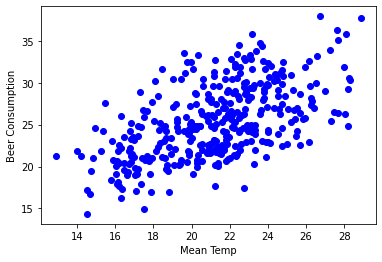

In [68]:
plt.scatter(df['media_temp_celsius'], df['beer_consumption_liter'], color='blue')
plt.xlabel('Mean Temp')
plt.ylabel('Beer Consumption')
plt.show()

##2nd: Let's now training the Linear Regression model

In [23]:
# creat a linear regression object
lr = linear_model.LinearRegression()

In [24]:
# fit the model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Linear Regression model fitted, trained and READY t be used!

In [69]:
# Show intercept and angular coeficient
print('(m) Angular Coeficient', lr.coef_)
print('(b) Intercept', lr.intercept_)
print(f'Linear statistical learning model y = {lr.coef_[0]:.2f}x1 + {lr.coef_[0]:.2f}x2 + {lr.coef_[0]:.2f}x3 + {lr.coef_[0]:.2f}x4 + {lr.coef_[0]:.2f}x5 + {lr.intercept_:.2f}')

(m) Angular Coeficient [ 0.09651351 -0.06281587  0.63068847 -0.04341428  5.14718829]
(b) Intercept 6.419258105234832
Linear statistical learning model y = 0.10x1 + 0.10x2 + 0.10x3 + 0.10x4 + 0.10x5 + 6.42


## Precditing targets (lables) values

In [70]:
y_pred = lr.predict(X_test)

##Model Metrics

In [71]:
#print('SSE: %2.f' % np.sum((y_pred - y_test)**2))
print('MSE: %2.f' % mean_squared_error(y_test, y_pred))
print('MAE: %2.f' % mean_absolute_error(y_test, y_pred))
print('RMSE: %2.f' % sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: %2.f' % r2_score(y_pred, y_test))

MSE:  6
MAE:  2
RMSE:  2
R2 Score:  1
